# Imports
All imports used in this notebook:

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Subset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchinfo import summary
from matplotlib import pyplot as plt

from model import LeNet5Mod
from optimize import train_loop, test_loop

# Device for training
Check if CUDA is available:

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


# Dataset and Dataloader
Download MNIST data set:

In [3]:
train_data = datasets.MNIST(
    root="../data",
    train=True,
    download=True,
    transform=ToTensor()
)

train_set, val_set = torch.utils.data.random_split(train_data, [50000, 10000])

test_set = datasets.MNIST(
    root="../data",
    train=False,
    download=True,
    transform=ToTensor()
)

/home/nilsm/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1631630839582/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Wrap a data loader around:

In [4]:
train_dataloader = DataLoader(train_set, batch_size=64)
val_dataloader = DataLoader(val_set, batch_size=64)
test_dataloader = DataLoader(test_set, batch_size=64)

Look first at the shape of our data:

In [5]:
train_data[0][0].shape

torch.Size([1, 28, 28])

Look at some samples of the data:

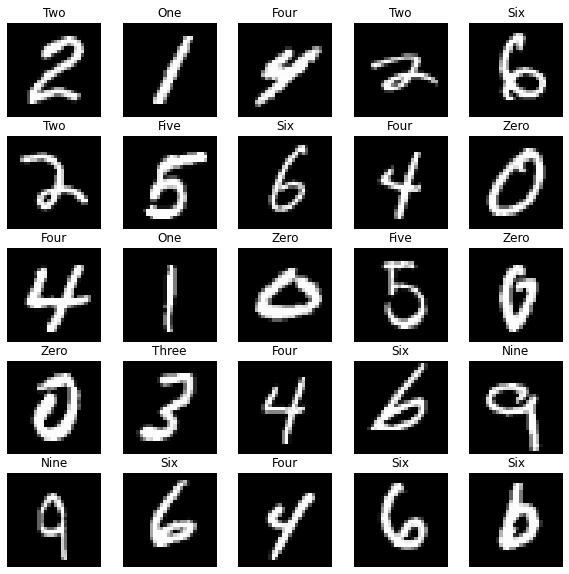

In [6]:
labels_map = {
    0: "Zero",
    1: "One",
    2: "Two",
    3: "Three",
    4: "Four",
    5: "Five",
    6: "Six",
    7: "Seven",
    8: "Eight",
    9: "Nine"
}

fig = plt.figure(figsize=(10, 10))
rows, cols = 5, 5
for i in range(1, rows * cols + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Model
Use self implemented, modified LeNet5:

In [7]:
model = LeNet5Mod().to(device)

Let's look at our model in detail:

In [8]:
summary(model, (1, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
LeNet5Mod                                --                        --
├─Sequential: 1-1                        [1, 10]                   --
│    └─Conv2d: 2-1                       [1, 6, 28, 28]            156
│    └─MaxPool2d: 2-2                    [1, 6, 14, 14]            --
│    └─ReLU: 2-3                         [1, 6, 14, 14]            --
│    └─Conv2d: 2-4                       [1, 16, 10, 10]           2,416
│    └─MaxPool2d: 2-5                    [1, 16, 5, 5]             --
│    └─ReLU: 2-6                         [1, 16, 5, 5]             --
│    └─Conv2d: 2-7                       [1, 120, 1, 1]            48,120
│    └─Flatten: 2-8                      [1, 120]                  --
│    └─Linear: 2-9                       [1, 84]                   10,164
│    └─ReLU: 2-10                        [1, 84]                   --
│    └─Linear: 2-11                      [1, 10]                   850
To

Define Cross Entropy Loss as loss function:

In [9]:
loss_fn = nn.CrossEntropyLoss()

# Hyperparameter
- Learning rate
- Batch size
- Epochs

In [10]:
learning_rate = 5e-2
batch_size = 64
epochs = 20

# Optimization Loop
Select an optimizer:

In [11]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Overfit to few samples to check if everything works fine:

In [12]:
sample_data = torch.utils.data.Subset(train_data, range(0,2))
sample_dataloader = DataLoader(sample_data, batch_size=2)
for t in range(100):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(sample_dataloader, model, loss_fn, optimizer, device)
test_loop(val_dataloader, model, loss_fn, device)

Epoch 1
-------------------------------
Train loss: 2.2160115242004395]
Epoch 2
-------------------------------
Train loss: 2.1727046966552734]
Epoch 3
-------------------------------
Train loss: 2.1337802410125732]
Epoch 4
-------------------------------
Train loss: 2.0945329666137695]
Epoch 5
-------------------------------
Train loss: 2.052797317504883]
Epoch 6
-------------------------------
Train loss: 2.0092391967773438]
Epoch 7
-------------------------------
Train loss: 1.9611120223999023]
Epoch 8
-------------------------------
Train loss: 1.9041868448257446]
Epoch 9
-------------------------------
Train loss: 1.834219217300415]
Epoch 10
-------------------------------
Train loss: 1.7432887554168701]
Epoch 11
-------------------------------
Train loss: 1.6204191446304321]
Epoch 12
-------------------------------
Train loss: 1.4482733011245728]
Epoch 13
-------------------------------
Train loss: 1.2166517972946167]
Epoch 14
-------------------------------
Train loss: 0.9605740

Train neural network

In [13]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    test_loop(val_dataloader, model, loss_fn, device)
print("Done!")

Epoch 1
-------------------------------
Train loss: 6.817384719848633]
Accuracy: 96.09, Avg loss: 0.13104472093426497 

Epoch 2
-------------------------------
Train loss: 0.14114680886268616]
Accuracy: 97.03, Avg loss: 0.09721325269668915 

Epoch 3
-------------------------------
Train loss: 0.06813602894544601]
Accuracy: 97.34, Avg loss: 0.08495080355958194 

Epoch 4
-------------------------------
Train loss: 0.05199100077152252]
Accuracy: 97.78, Avg loss: 0.07166286874087943 

Epoch 5
-------------------------------
Train loss: 0.03883956000208855]
Accuracy: 97.98, Avg loss: 0.06322365441466356 

Epoch 6
-------------------------------
Train loss: 0.02743385173380375]
Accuracy: 98.08, Avg loss: 0.05979027385692925 

Epoch 7
-------------------------------
Train loss: 0.02263544127345085]
Accuracy: 98.1, Avg loss: 0.059739838449942885 

Epoch 8
-------------------------------
Train loss: 0.022093208506703377]
Accuracy: 98.19, Avg loss: 0.05725076408748319 

Epoch 9
-----------------

Test final accuracy by passing unseen data to the neural network:

In [14]:
test_loop(test_dataloader, model, loss_fn, device)

Accuracy: 98.72999999999999, Avg loss: 0.042580182875908694 



Hint: Clear cuda cache by using torch.cuda.empty_cache()